

Analisi
Serie storica Bitcoin
Inizio importando il dataset


In [ ]:
#importo le librerie necessarie
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

#Importazione di pacchetti per la previsione di dati di serie temporali
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DATAISBI/coin_Bitcoin.csv", parse_dates=['Date'])
df.head(5)

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


Visulizzazione delle prime statistiche

In [ ]:
print (df.describe())

               SNo          High           Low          Open         Close  \
count  2991.000000   2991.000000   2991.000000   2991.000000   2991.000000   
mean   1496.000000   6893.326038   6486.009539   6700.146240   6711.290443   
std     863.571653  11642.832456  10869.032130  11288.043736  11298.141921   
min       1.000000     74.561096     65.526001     68.504997     68.431000   
25%     748.500000    436.179001    422.879486    430.445496    430.569489   
50%    1496.000000   2387.610107   2178.500000   2269.889893   2286.409912   
75%    2243.500000   8733.926948   8289.800459   8569.656494   8576.238715   
max    2991.000000  64863.098908  62208.964366  63523.754869  63503.457930   

             Volume     Marketcap  
count  2.991000e+03  2.991000e+03  
mean   1.090633e+10  1.208761e+11  
std    1.888895e+10  2.109438e+11  
min    0.000000e+00  7.784112e+08  
25%    3.036725e+07  6.305579e+09  
50%    9.460360e+08  3.741503e+10  
75%    1.592015e+10  1.499957e+11  
max    3.

#

Si analizza il prezzo di chiusura giornaliero.
Per questo obbiettivo si isola insieme alla data.


In [ ]:
df1 = df[['Date','Close']]
df1.head(3)

,Date,Close
0,2013-04-29 23:59:59,144.539993
1,2013-04-30 23:59:59,139.000000
2,2013-05-01 23:59:59,116.989998


A questo punto si setta come asse x la Data e si ordina in senso crescente (per sicurezza) .
A questo punto si fa un semplice plot, del "Close" rispetto a "Date"

<Axes: xlabel='Date'>

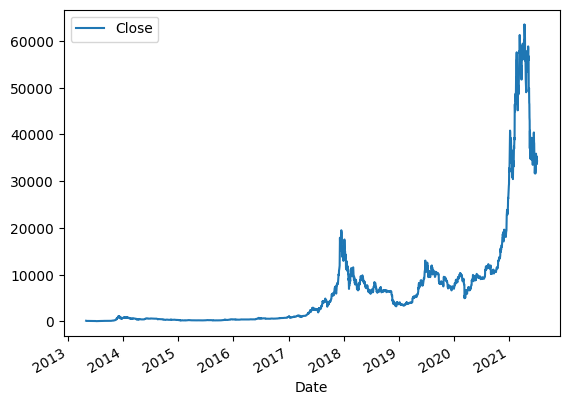

In [ ]:
df_ts = df1.set_index('Date')
df_ts.sort_index(inplace=True)
df_ts.plot()

Per un analisi ulteriore si testa la stazionarietà.
Per definizione si ha: Una serie temporale stazionaria è una serie le cui proprietà statistiche non dipendono dal tempo in cui la serie viene osservata.
Si effettuano due Test Dickey-Fuller Aumentato e KPSS.

In [ ]:
# Dickey Fuller
def test_stationarityDF(timeseries):
    # Perform Dickey-Fuller test:
    from statsmodels.tsa.stattools import adfuller
    print('Results of Dickey-Fuller Test:')
    print ("==============================================")

    dftest = adfuller(timeseries, autolag='AIC')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])

    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value

    print(dfoutput)

#KPSS
def test_stationarityKPSS(timeseries):
    # Perform Dickey-Fuller test:
    print('Results of KPSS Test:')
    print ("==============================================")

    import statsmodels.api as sm
    kpsstest = sm.tsa.stattools.kpss(df_ts["Close"], regression='ct')

    dfoutput = pd.Series(kpsstest[0:3], index=['Test Statistic', 'p-value', '#lags Used'])

    for key, value in kpsstest[3].items():
        dfoutput['Critical Value (%s)'%key] = value

    print(dfoutput)

# Descrizone test:
DF :  **H0** la distribuzione è **non stazionaria**. **H1** la distribuzione è **stazionaria**

KPSS : **H0** la distribuzione **è stazionaria**. **H1** la distribuzione è **non stazionaria**

In [ ]:
#richiamo le funzione che eseguono i test e ne stampano i risultati
ts = df_ts['Close']
test_stationarityDF(ts)
print()
print()
test_stationarityKPSS(ts)

Results of Dickey-Fuller Test:
Test Statistic                   -0.797310
p-value                           0.819911
#lags Used                       29.000000
Number of Observations Used    2961.000000
Critical Value (1%)              -3.432560
Critical Value (5%)              -2.862517
Critical Value (10%)             -2.567290
dtype: float64


Results of KPSS Test:
Test Statistic            0.774032
p-value                   0.010000
#lags Used               32.000000
Critical Value (10%)      0.119000
Critical Value (5%)       0.146000
Critical Value (2.5%)     0.176000
Critical Value (1%)       0.216000
dtype: float64


<ipython-input-92-6991bd5e81c0>:24: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = sm.tsa.stattools.kpss(df_ts["Close"], regression='ct')



# **Conclusioni**

Il test di Dickey-Fuller Aumentato non rigetta l'ipotesi nulla a causa del valore del valore pvalue alto.

Il test KPSS rigetta l'ipotesi nulla grazie a valore pvalue molto basso (per una confidenza del 95%).

Pertanto, dal punto di vista statistico, per entrambi i test(e ovviamente dal grafico) la serie temporale non è stazionaria.


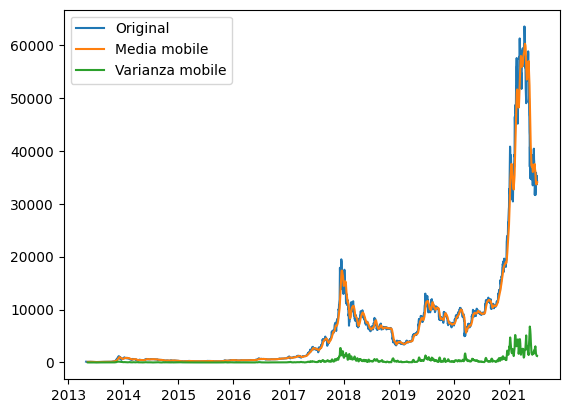

In [ ]:
# Tracciamo la media e la varianza mobile di 12 mesi e troviamo gli insight.
# Statistiche periodiche
rolmean = ts.rolling(window=12).mean()
rolvar = ts.rolling(window=12).std()

plt.plot(ts, label='Original')
plt.plot(rolmean, label='Media mobile')
plt.plot(rolvar, label='Varianza mobile')
plt.legend(loc='best')
plt.show(block=False)

Si adopera la funzione decompose per vedere eventuali trend stagionali.

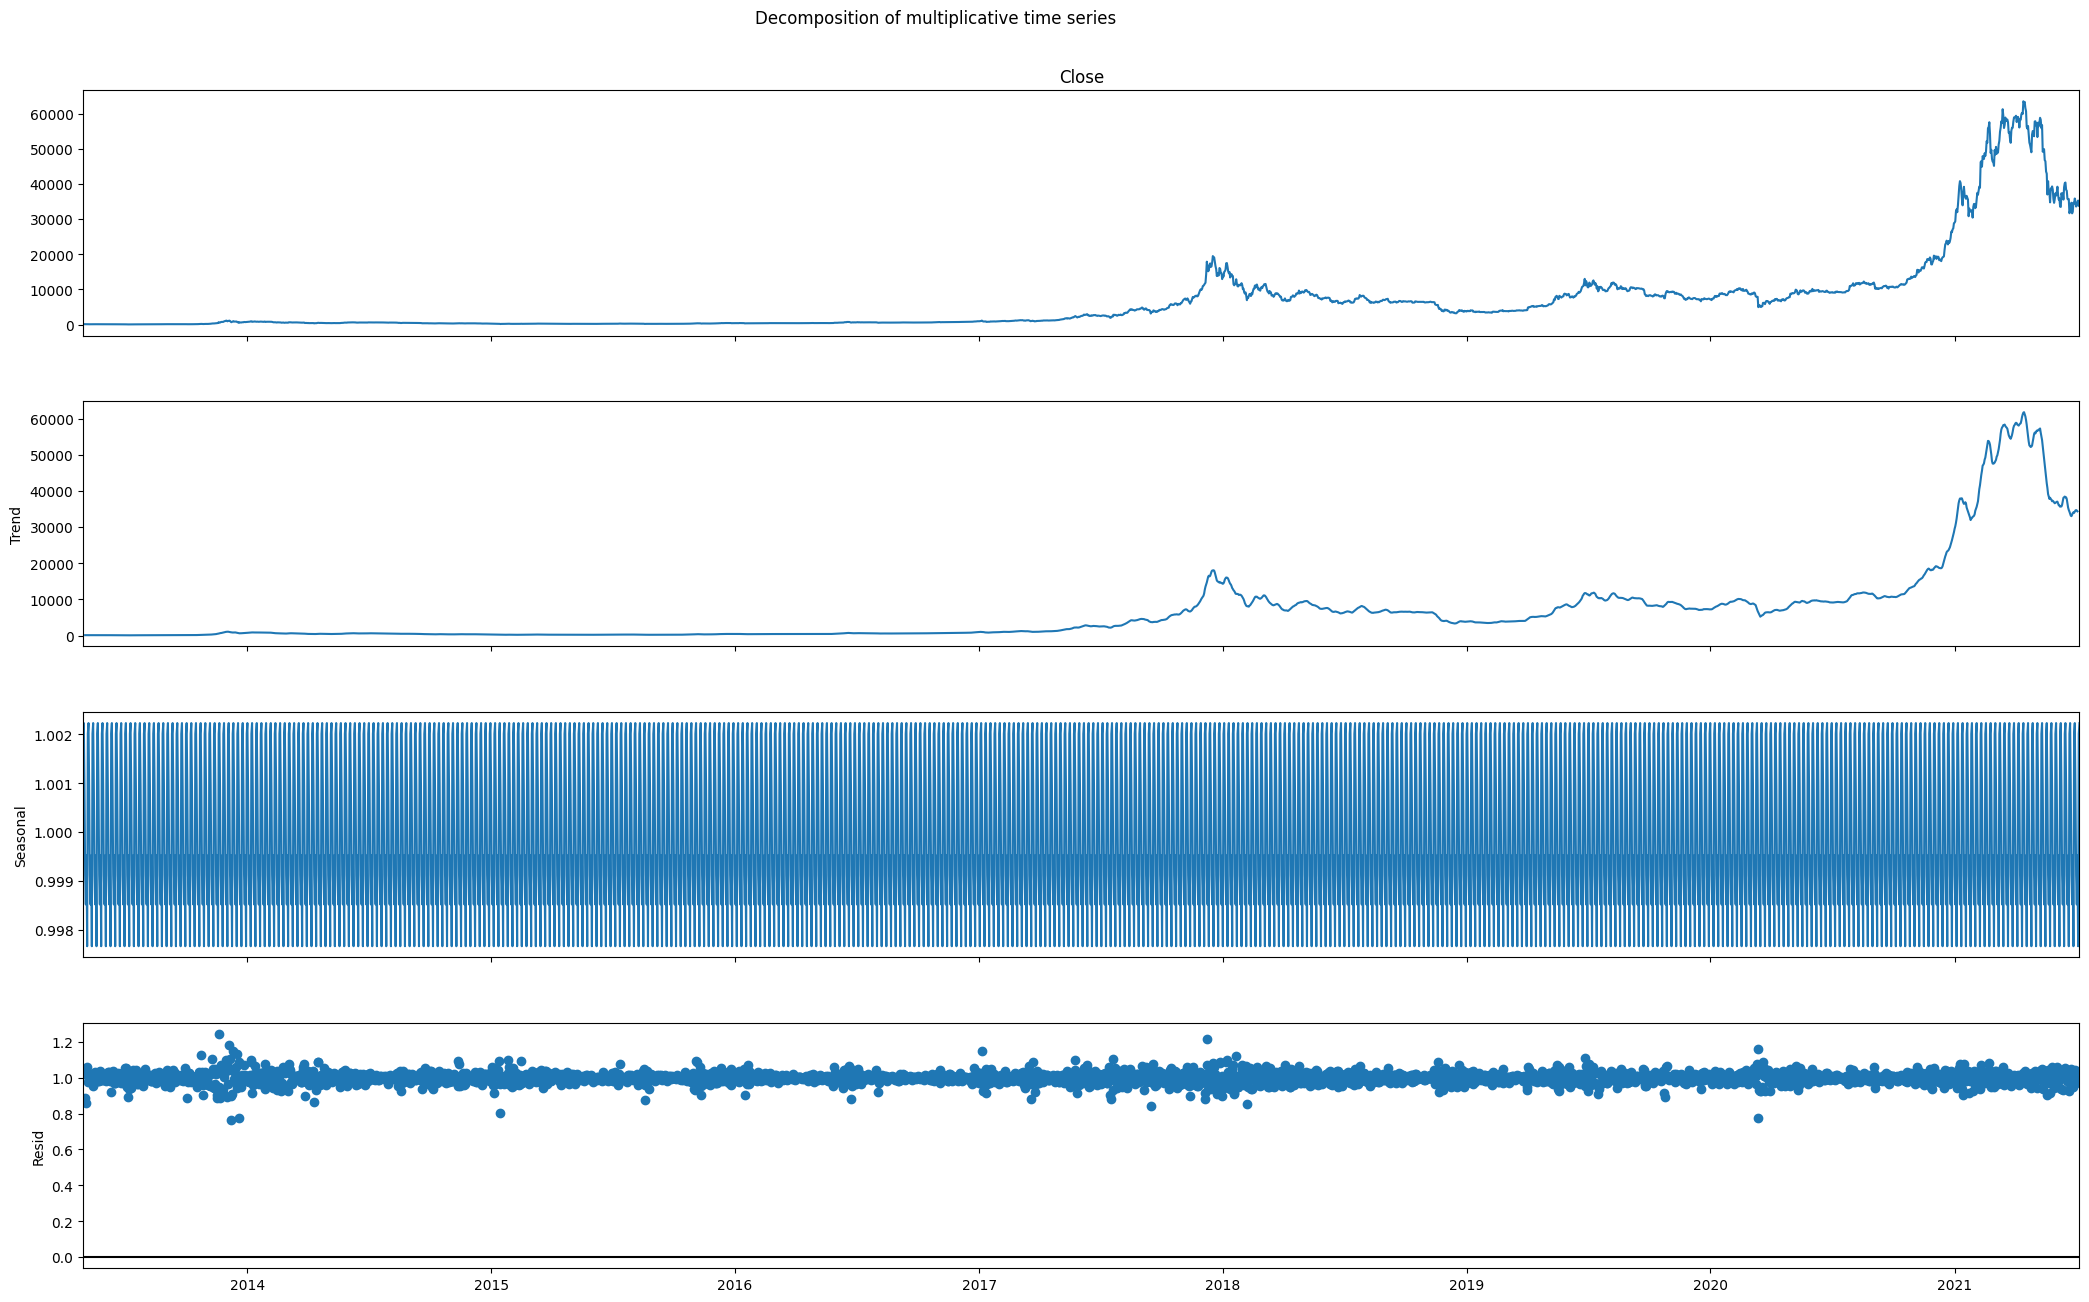

In [ ]:
decomposition = sm.tsa.seasonal_decompose(ts, model='multiplicative')

fig = decomposition.plot()
fig.set_figwidth(24)
fig.set_figheight(14)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()

# **Conslusione**

Il grafico stagionale è troppo sovrapposto e non ci permette di vedere nulla di specifico. Questo era ovvio, dato che stiamo analizzando dati giornalieri.

Proviamo un approccio mensile dopodichè si rieseguono i test.


In [ ]:
df_ts_m = df_ts.resample('M').mean()
print (df_ts_m.head(3))

                 Close
Date                  
2013-04-30  141.769997
2013-05-31  119.992741
2013-06-30  107.761407


In [ ]:
#Si rieseguono i test statistici per la stazionarietà
tsm = df_ts_m['Close']
test_stationarityDF(tsm)
print()
print()
test_stationarityKPSS(tsm)

Results of Dickey-Fuller Test:
Test Statistic                  2.439923
p-value                         0.999028
#lags Used                      4.000000
Number of Observations Used    95.000000
Critical Value (1%)            -3.501137
Critical Value (5%)            -2.892480
Critical Value (10%)           -2.583275
dtype: float64


Results of KPSS Test:
Test Statistic            0.774032
p-value                   0.010000
#lags Used               32.000000
Critical Value (10%)      0.119000
Critical Value (5%)       0.146000
Critical Value (2.5%)     0.176000
Critical Value (1%)       0.216000
dtype: float64


<ipython-input-92-6991bd5e81c0>:24: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = sm.tsa.stattools.kpss(df_ts["Close"], regression='ct')


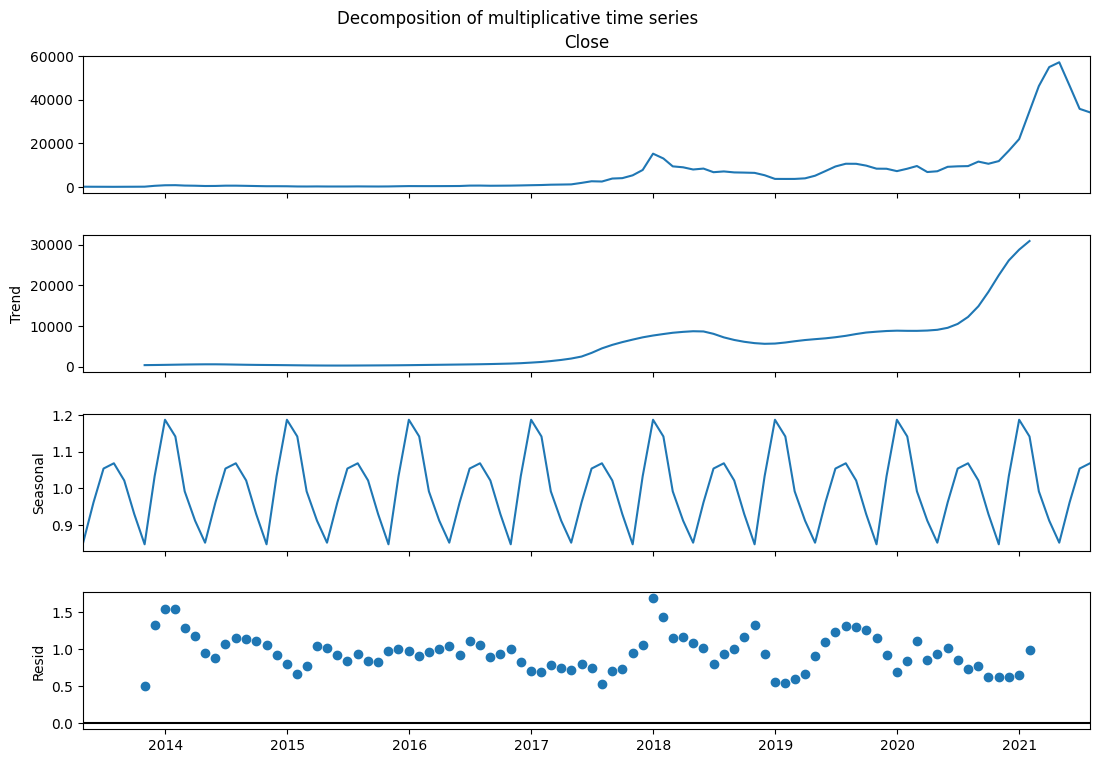

In [ ]:
decomposition = sm.tsa.seasonal_decompose(tsm, model='multiplicative')

fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()




# Conclusione

Il grafico della stagionalità è un po' più chiaro.

In [ ]:
#Per le tecniche con modelli autoregressivi ho bisogno di rendere la serie stazionaria.
#Eseguo quindi un trasformazione logaritma
tsmlog = np.log10(tsm)
tsmlog.dropna(inplace=True)
#Viene calcolata la differenza tra i valori trasformati al tempo t e quelli al tempo t-1. Questo è noto come differenziazione di primo ordine e può essere utile per rimuovere le tendenze o le componenti di lungo termine dalla serie.
tsmlogdiff = tsmlog.diff(periods=1)
tsmlogdiff.dropna(inplace=True)
#Verifico quindi la stazionarietà di nuovo
test_stationarityDF(tsmlogdiff)
test_stationarityKPSS(tsmlogdiff)

Results of Dickey-Fuller Test:
Test Statistic                -6.598598e+00
p-value                        6.825493e-09
#lags Used                     0.000000e+00
Number of Observations Used    9.800000e+01
Critical Value (1%)           -3.498910e+00
Critical Value (5%)           -2.891516e+00
Critical Value (10%)          -2.582760e+00
dtype: float64
Results of KPSS Test:
Test Statistic            0.774032
p-value                   0.010000
#lags Used               32.000000
Critical Value (10%)      0.119000
Critical Value (5%)       0.146000
Critical Value (2.5%)     0.176000
Critical Value (1%)       0.216000
dtype: float64


<ipython-input-92-6991bd5e81c0>:24: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = sm.tsa.stattools.kpss(df_ts["Close"], regression='ct')



## Conclusione

Ora la statistica del test è inferiore al valore critico, il che significa che la serie temporale è ora stazionaria. Ora possiamo utilizzarla nelle tecniche di previsione come l'ARIMA

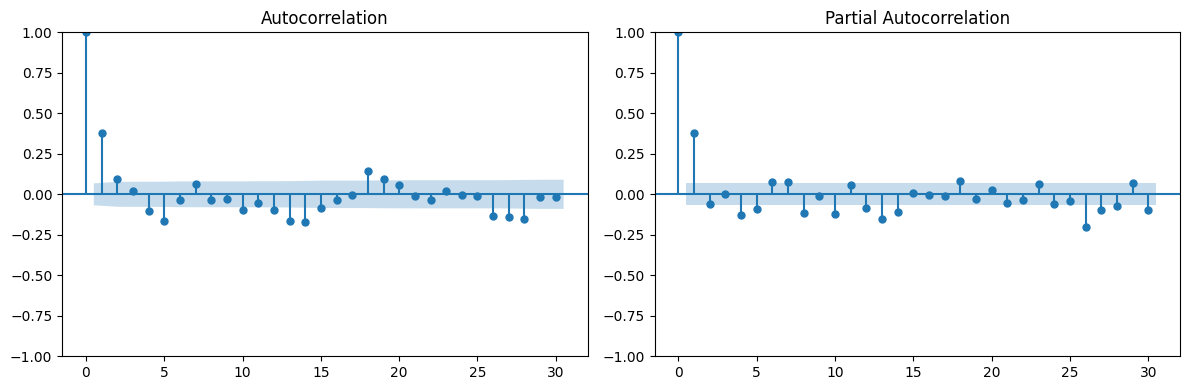

In [ ]:
# Tracciamo i grafici ACF e PACF per visualizzare le componenti AR e MA.

fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(tsmlogdiff, lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(tsmlogdiff, lags=30, ax=axes[1], alpha=0.5)
plt.tight_layout()

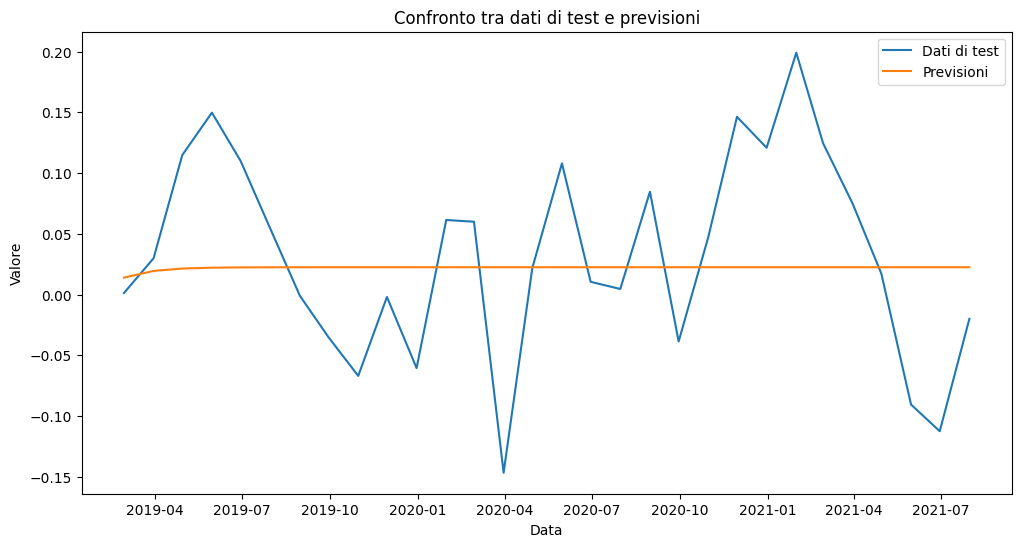

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

# Creazione del DataFrame con la colonna "Close" come serie temporale e le date come indice
df = pd.DataFrame({"Close": tsmlogdiff}, index=tsmlogdiff.index)

# Divisione del dataset in dati di addestramento e dati di test (70% training, 30% test)
train_size = int(len(df) * 0.7)
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

# Creazione e addestramento del modello AR
lag = 1  # Ordine del modello AR (1 per un modello AR(1))
model = AutoReg(train_data, lags=lag)
model_fit = model.fit()

# Previzione sui dati di test
predictions = model_fit.predict(start=len(train_data), end=len(df)-1)

# Visualizzazione dei dati di test e delle previsioni
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data["Close"], label="Dati di test")
plt.plot(test_data.index, predictions, label="Previsioni")
plt.xlabel("Data")
plt.ylabel("Valore")
plt.title("Confronto tra dati di test e previsioni")
plt.legend()
plt.show()

#Metriche
A questo punto osserviamo le metriche per valutare la bontà del modello.

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calcolo delle previsioni
predictions = model_fit.predict(start=len(train_data), end=len(df)-1)

# Calcolo delle metriche di valutazione
mse = mean_squared_error(test_data["Close"], predictions)
mae = mean_absolute_error(test_data["Close"], predictions)
r2 = r2_score(test_data["Close"], predictions)
acf_values = acf(test_data["Close"] - predictions)
pacf_values = pacf(test_data["Close"] - predictions)

# Stampa delle metriche di valutazione
print("Metriche di valutazione del modello:")
print()
print("Mean Squared Error (MSE):", mse)
print()
print("Mean Absolute Error (MAE):", mae)
print()
print("Autocorrelation Function (ACF):", acf_values)
print()
print("Partial Autocorrelation Function (PACF):", pacf_values)

Metriche di valutazione del modello:

Mean Squared Error (MSE): 0.006764374895982009

Mean Absolute Error (MAE): 0.0666625575985775

Autocorrelation Function (ACF): [ 1.          0.47492361  0.1230473   0.08142928 -0.28392376 -0.33466677
 -0.12622278 -0.15212247 -0.12047862 -0.02821739 -0.19644514 -0.1252028
 -0.05123114 -0.11811921 -0.06616683]

Partial Autocorrelation Function (PACF): [ 1.          0.49130029 -0.14439244  0.11751808 -0.55968836  0.11159851
 -0.02453    -0.06169251 -0.172409   -0.15471574 -0.47888911  0.29531124
 -0.68708776  0.57277105 -3.66548955]


# Regressione Lineare semplice tra Close ed Open


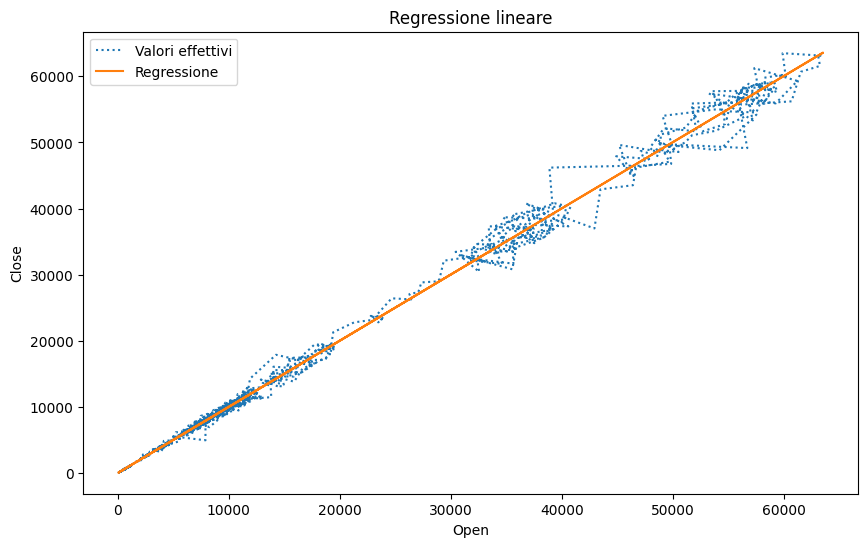

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
data = df[['Date', 'Open', 'Close']]
x = data[['Open']]
y = data['Close']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Creazione e addestramento del modello di regressione lineare
model = LinearRegression()
model.fit(x_train, y_train)

# Visualizzazione dei risultati della regressione lineare
plt.figure(figsize=(10, 6))
plt.plot(data["Open"], data['Close'],linestyle='dotted', label='Valori effettivi')
plt.plot(data["Open"], model.predict(x), label='Regressione')
plt.xlabel('Open')
plt.ylabel('Close')
plt.title('Regressione lineare')
plt.legend()
plt.show()



# Residui
Diamo un occhio ai residui

In [ ]:
import scipy.stats as stats

# Calcolo dei residui
residuals = y_test - model.predict(x_test)

# Plot dei residui
plt.figure(figsize=(10, 6))
plt.scatter(x_test, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Open')
plt.ylabel('Residui')
plt.title('Plot dei residui')
plt.show()

# Test di normalità sui residui
normality_test = stats.normaltest(residuals)
print("Risultati del test di normalità:")
print("Statistiche del test:", normality_test.statistic)
print("Valore p del test:", normality_test.pvalue)

from statsmodels.stats.diagnostic import het_goldfeldquandt

# Test di Goldfeld-Quandt per l'omoschedasticità
gq_test = het_goldfeldquandt(residuals, x_test)
print("Risultati del test di Goldfeld-Quandt:")
print("Statistiche del test:", gq_test[0])
print("Valore p del test:", gq_test[1])

Già dal grafico si nota come ci sia un trende crescente.



# Conclusioni
I residui dal grafico e dai test risultano normali ed omoschedastici.
Quindi è corretto adoperare un modello di regressione lineare semplice.

Si verificano quindi le metriche per misurare la bontà del modello.

In [ ]:
# Calcolo del coefficiente di determinazione (R^2) e dell'errore quadratico medio (RMSE)
r2_score = model.score(x_test, y_test)
rmse = mean_squared_error(y_test, model.predict(x_test))
print(model.intercept_, model.coef_, model.score(x_test, y_test))
print(r2_score)
print(rmse)

9.736803738430353 [1.00054593] 0.9982998053628643
0.9982998053628643
166661.1454071417


In [ ]:
y = data['Close']

#define predictor variables
x = data['Open']

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.101e+06
Date:                Wed, 21 Feb 2024   Prob (F-statistic):               0.00
Time:                        11:19:02   Log-Likelihood:                -23315.
No. Observations:                2991   AIC:                         4.663e+04
Df Residuals:                    2989   BIC:                         4.665e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.2322     12.501      1.138      0.2